In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import random
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [422]:
test_X.shape, test_y.shape      #10k training images

((10000, 28, 28), (10000,))

In [423]:
train_X.shape, train_y.shape    #60k training images

((60000, 28, 28), (60000,))

In [0]:
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

In [425]:
train_X.shape , test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

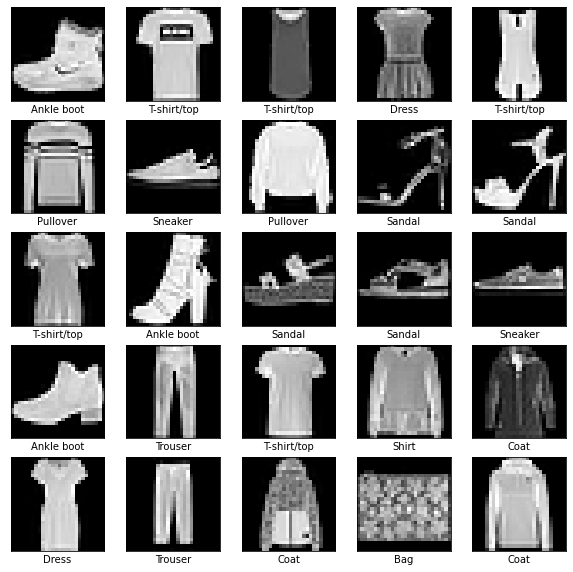

In [426]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(train_X[i]), cmap='gray')
    plt.xlabel(class_names[train_y[i]])
plt.show()

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')


train_X = train_X / 255.0
test_X = test_X / 255.0



In [0]:
def my_model():
    model = keras.models.Sequential()

    model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', input_shape=train_X.shape[1:]))
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Conv2D(16, (3,3), padding='same', activation='relu')) #newly added
    model.add(keras.layers.MaxPooling2D(2,2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation='relu')) #newly added
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    opt = keras.optimizers.Adam(learning_rate=0.0001, beta_2=0.99)

    model.compile(optimizer=opt, 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model
    

In [0]:
model = my_model()
history =  model.fit(train_X, train_y, 
                     epochs=50,
                     batch_size=32,
                     validation_data=(test_X, test_y))

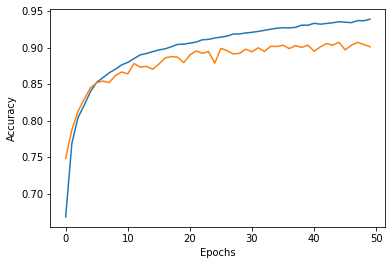

In [430]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

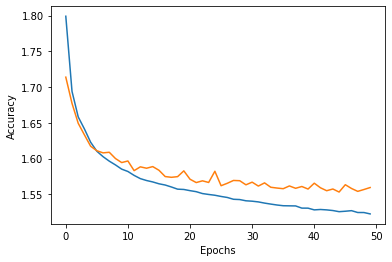

In [431]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
model.save('final_model.h5')

In [0]:
from sklearn.model_selection import KFold

In [0]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracy = []

def cross_validate_model(train_X, train_y):
    model = my_model()
    for train_ix, test_ix in kfold.split(train_X):
        trainX, trainy, testX, testy = train_X[train_ix], train_y[train_ix], train_X[test_ix], train_y[test_ix]
        fold_history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))
        _, acc = model.evaluate(testX, testy) 
        fold_accuracy.append(round(acc, 2))

    return fold_accuracy

In [435]:
cross_validate_model(train_X, train_y)

Epoch 1/10
1500/1500 [==============================] - 8s 6ms/step - loss: 1.8024 - accuracy: 0.6700 - val_loss: 1.7385 - val_accuracy: 0.7251
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6965 - accuracy: 0.7667 - val_loss: 1.6744 - val_accuracy: 0.7880
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6675 - accuracy: 0.7960 - val_loss: 1.6527 - val_accuracy: 0.8107
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6483 - accuracy: 0.8147 - val_loss: 1.6354 - val_accuracy: 0.8282
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6362 - accuracy: 0.8265 - val_loss: 1.6277 - val_accuracy: 0.8344
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6230 - accuracy: 0.8395 - val_loss: 1.6319 - val_accuracy: 0.8308
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 1.6154 - accuracy: 0.8470 - val_loss: 1.6326 - val_accuracy:

[0.86, 0.9, 0.91, 0.92, 0.92]

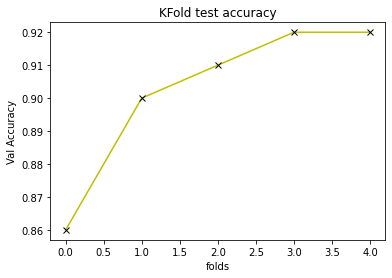

In [449]:
plt.title("KFold test accuracy",)
plt.xlabel("folds")
plt.ylabel('Val Accuracy')
plt.plot(fold_accuracy, 'y')
plt.plot(fold_accuracy, 'x', color='k')
plt.show()